In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import io

import vertexai

from PIL import Image as PILImage

from vertexai.generative_models import GenerativeModel, Part, Image
from vertexai.preview.language_models import TextGenerationModel

Training Label:  7
Predict =   9


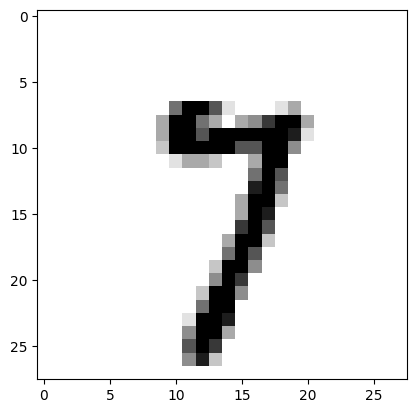

Training Label:  7
Predict =   9


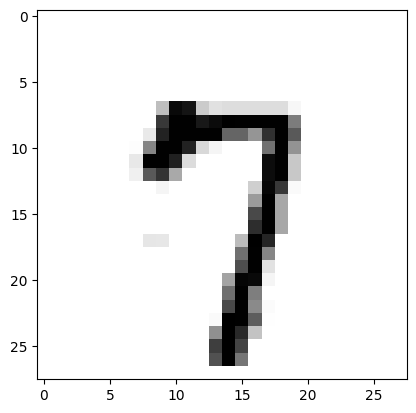

Training Label:  0
Predict =   9


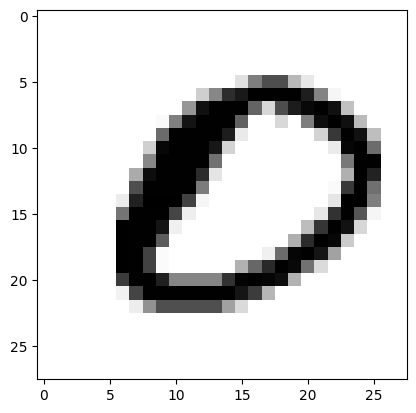

In [40]:
vertexai.init(project="level-scheme-423322-j9", location="us-central1")

model = GenerativeModel(model_name="gemini-1.0-pro-vision-001")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
random_inds = np.random.choice(60000,36)
filename = "mnist_"
for i in range(3):
    image_ind = random_inds[i]
    imageIn = train_images[image_ind]
    print("Training Label: ", train_labels[image_ind])

    # Convert the image to a PIL Image object
    image = PILImage.fromarray(imageIn)

    # Save the image as a JPEG file in memory
    buffer = io.BytesIO()
    image.save(buffer, format='JPEG')
    #image.save(filename+str(i), format='JPEG')
    #image_parta = Part.from_image(Image.load_from_file(filename+str(i)))
    image_partb = Part.from_image(Image.from_bytes(buffer.getvalue()))
    response = model.generate_content([image_parta, "Determine what handwritten number is this image and output as single integer."])
    print("Predict = ", response.text)
    plt.imshow(np.squeeze(image), cmap=plt.cm.binary)
    plt.show()
    # Open the image file

